In [1]:
import sys
sys.path.append("../..")

import pandas

from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from pandas import DataFrame

# Import dictonaries and Types
from app.components.basic_dataframes import dictMealState, dfMealCode, dfMealState
from app.components.simple_types import Nutrition, State
from app.components.extract_data.extract_data import getDictPersonIdStrata
from app.components.extract_data.extract_data import getDfPersonAdultsMale

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult

Loading basic data
Loading basic dictionary
Finish!


In [2]:
from app.components.extract_data.extract_data import getDfConsumo, getDictNutritionByMeal

dfConsumo = getDfConsumo()
dictNutritionByMeal = getDictNutritionByMeal()

dfConsumo[ ["COD_TBCA", "V9001"] ]
print(f"TBCA uniques: {len(set(dfConsumo['COD_TBCA'].to_list()))}")
print(f"V9001 uniques: {len(set(dfConsumo['V9001'].to_list()))}")

TBCA uniques: 1122
V9001 uniques: 1501


In [3]:
dfMealState

,PESSOA,C0002A,C0008D,C0081H,C0007K,C0209A,C0638F,C0091T,C0008U,C0145H,...,C0391F,C0536A,C0060T,C0171T,C0212B,C0471F,C0083N,C0196F,C0757A,C0379E
0,110000016.0#2.0#1.0#1.0,70.0,14.0,150.0,15.0,180.0,140.0,70.0,270.0,900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,110000016.0#2.0#1.0#2.0,70.0,14.0,150.0,15.0,180.0,70.0,70.0,225.0,900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,110000016.0#2.0#1.0#3.0,70.0,14.0,150.0,15.0,270.0,210.0,350.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110000016.0#7.0#1.0#1.0,0.0,0.0,100.0,10.0,90.0,0.0,34.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110000016.0#7.0#1.0#2.0,0.0,19.5,100.0,10.0,45.0,0.0,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46159,530044198.0#3.0#1.0#4.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46160,530044198.0#9.0#1.0#1.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,2400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46161,530044198.0#9.0#1.0#2.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,2100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210.0
46162,530044198.0#11.0#1.0#1.0,0.0,0.0,400.0,40.0,125.0,0.0,0.0,0.0,2000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dfConsumo.columns

Index(['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG', 'COD_UPA', 'NUM_DOM',
       'NUM_UC', 'COD_INFORMANTE', 'QUADRO', 'SEQ', 'V9005', 'V9007', 'V9001',
       'V9015', 'V9016', 'V9017', 'V9018', 'V9019', 'V9020', 'V9021', 'V9022',
       'V9023', 'V9024', 'V9025', 'V9026', 'V9027', 'V9028', 'V9029', 'V9030',
       'COD_UNIDADE_MEDIDA_FINAL', 'COD_PREPARACAO_FINAL', 'GRAMATURA1', 'QTD',
       'COD_TBCA', 'ENERGIA_KCAL', 'ENERGIA_KJ', 'PTN', 'CHOTOT', 'FIBRA',
       'LIP', 'COLEST', 'AGSAT', 'AGMONO', 'AGPOLI', 'AGTRANS', 'CALCIO',
       'FERRO', 'SODIO', 'MAGNESIO', 'FOSFORO', 'POTASSIO', 'COBRE', 'ZINCO',
       'VITA_RAE', 'TIAMINA', 'RIBOFLAVINA', 'NIACINA', 'PIRIDOXAMINA',
       'COBALAMINA', 'VITD', 'VITE', 'VITC', 'FOLATO', 'PESO', 'PESO_FINAL',
       'RENDA_TOTAL', 'DIA_SEMANA', 'DIA_ATIPICO', 'id', 'iddomic', 'PESSOA'],
      dtype='object')

In [5]:
dfConsumo[dfConsumo["V9001"] == 8000101.0][["V9001", "COD_PREPARACAO_FINAL", "ENERGIA_KCAL", "QTD"]]

,V9001,COD_PREPARACAO_FINAL,ENERGIA_KCAL,QTD
0,8000101.0,99.0,210.0,70.0
26,8000101.0,99.0,210.0,70.0
54,8000101.0,99.0,210.0,70.0
294,8000101.0,99.0,630.0,210.0
318,8000101.0,99.0,210.0,70.0
...,...,...,...,...
1174694,8000101.0,99.0,210.0,70.0
1174702,8000101.0,99.0,210.0,70.0
1174735,8000101.0,99.0,210.0,70.0
1174928,8000101.0,99.0,210.0,70.0


In [6]:
people = getDfPersonAdultsMale()["PESSOA"].to_list()

In [7]:
# Get all personID
# people = list(dictMealState)
personID = people[1]
personID = people[2]
# personID = 'UNKNOW'
print("people:", people)
print("personID:", personID)

people: ['110000016.0#2.0#1.0#1.0', '110000016.0#2.0#1.0#3.0', '110000016.0#7.0#1.0#1.0', '110000602.0#2.0#1.0#1.0', '110000602.0#5.0#1.0#1.0', '110000602.0#8.0#1.0#2.0', '110000602.0#9.0#1.0#1.0', '110000620.0#13.0#1.0#1.0', '110001098.0#8.0#1.0#1.0', '110001197.0#11.0#1.0#1.0', '110001197.0#7.0#1.0#2.0', '110001240.0#13.0#1.0#1.0', '110001665.0#16.0#1.0#1.0', '110001665.0#2.0#1.0#2.0', '110002023.0#12.0#1.0#1.0', '110002041.0#11.0#1.0#2.0', '110002041.0#11.0#1.0#3.0', '110002041.0#4.0#1.0#3.0', '110002050.0#2.0#1.0#1.0', '110002149.0#10.0#1.0#2.0', '110002149.0#11.0#1.0#1.0', '110002291.0#12.0#1.0#1.0', '110002291.0#5.0#1.0#1.0', '110002291.0#8.0#1.0#1.0', '110002334.0#11.0#1.0#2.0', '110002334.0#12.0#1.0#1.0', '110002334.0#3.0#1.0#2.0', '110004152.0#10.0#1.0#1.0', '110004152.0#5.0#1.0#2.0', '110004152.0#7.0#1.0#2.0', '110004444.0#13.0#1.0#1.0', '110004444.0#15.0#1.0#2.0', '110004444.0#15.0#1.0#3.0', '110004444.0#16.0#1.0#1.0', '110004557.0#1.0#1.0#1.0', '110004557.0#3.0#1.0#1.0', '1

In [8]:
# fitness = Nutrition.absDifference
fitness = Nutrition.absDifferenceNegativePenalty
# fitness = Nutrition.distanceDifference
# result = papaSingleSeach(personID, max_population_set=10, max_population_selected=5, max_steps=1000)
# result = papaSingleSeach(personID, verbose=True, max_population_set=10,max_population_selected=5, unit=50, max_unit=5, max_steps=25)
result = papaSingleSeach(personID, verbose=True, unit=50, max_unit=2, max_population_set=500, max_population_selected=300, expansion_set=50, expansion_select=20, max_steps=100, fitness=fitness)
# result = papaSingleSeach(personID, verbose=True, unit=100, max_unit=2, max_population_set=10, max_population_selected=10, expansion_set=10, expansion_select=3, max_steps=25, fitness=fitness)
# result = papaSingleSeach(personID, verbose=True, max_population_set=10,max_population_selected=8, expansion_set=5, unit=5, max_unit=10, max_steps=25, fitness=Nutrition.distanceDifference)

print(result)
targetNutrition = Nutrition.idealNutritionByPersonId(personID)
print("       PersonID: ", result.personIDs)
print("initialDistance: ", fitness(result.initialNutrition, targetNutrition))
print("  finalDistance: ", fitness(result.finalNutrition, targetNutrition))

Step 100: 
Best fitness:  1540.692644481278
initialState:  State: {'C0002A': 0.0, 'C0008D': 0.0, 'C0081H': 100.0, 'C0007K': 10.0, 'C0209A': 90.0, 'C0638F': 0.0, 'C0091T': 34.0, 'C0008U': 0.0, 'C0145H': 0.0, 'C0418A': 120.0, 'C0634F': 180.0, 'C0377B': 80.0, 'C0030H': 450.0, 'C0225A': 200.0, 'C0031D': 40.0, 'C0030L': 20.0, 'C0055A': 0.0, 'C0002D': 0.0, 'C0043A': 0.0, 'C0038C': 0.0, 'C0906B': 0.0, 'C0716F': 0.0, 'C0134C': 0.0, 'C0902B': 0.0, 'C0023C': 0.0, 'C0060K': 0.0, 'C0170A': 0.0, 'C0046K': 0.0, 'C0576F': 0.0, 'C0009H': 0.0, 'C0062H': 0.0, 'C0734F': 0.0, 'C0558B': 0.0, 'C0161C': 0.0, 'C0230F': 0.0, 'C0150B': 0.0, 'C0006C': 0.0, 'C0211A': 0.0, 'C0713F': 0.0, 'C0023J': 0.0, 'C0118B': 0.0, 'C0732F': 0.0, 'C0002C': 0.0, 'C0708F': 0.0, 'C0788B': 0.0, 'C0782B': 0.0, 'C0533F': 0.0, 'C0087B': 0.0, 'C0147C': 0.0, 'C0460A': 0.0, 'C0062K': 0.0, 'C0245F': 0.0, 'C0419A': 0.0, 'C0834A': 0.0, 'C0898F': 0.0, 'C0733F': 0.0, 'C0028J': 0.0, 'C0165A': 0.0, 'C0859F': 0.0, 'C0212A': 0.0, 'C0031H': 0.0, 'C

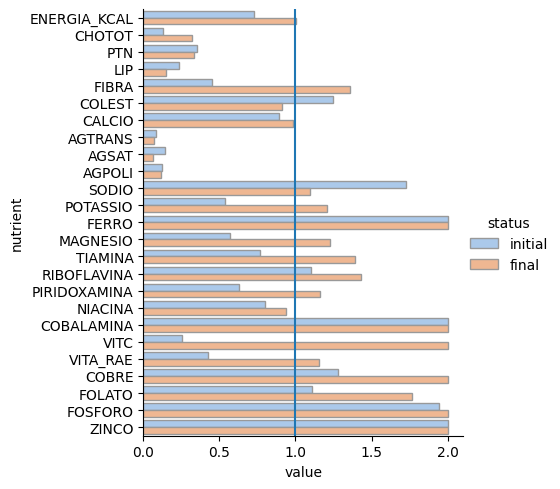

In [9]:
result.show_comparison_graph("", title="")


In [10]:
df = result.save_as_xls("./output/test_result")
targetNutrition = Nutrition.idealNutritionByPersonId(personID)
df.loc[df["Nutrient"] == "PTN", "Initial Value"] = 100*(result.initialNutrition["PTN"]/targetNutrition["ENERGIA_KCAL"])
df

,Nutrient,Initial Value,Final Value,Target Value
0,ENERGIA_KCAL,2130.860000,2933.960000,2932.530000
1,CHOTOT,7.086216,7.086216,7.086216
2,PTN,3.507436,3.507436,3.507436
3,LIP,3.477468,3.477468,3.477468
4,FIBRA,14.080000,42.080000,31.000000
5,COLEST,373.540000,272.530000,300.000000
6,CALCIO,776.750000,856.460000,868.000000
7,AGTRANS,0.082877,0.082877,0.082877
8,AGSAT,1.398935,1.398935,1.398935
9,AGPOLI,0.728804,0.728804,0.728804


In [11]:
from app.components.scripts.get_tbca import TBCA

dictTBCAName = TBCA.getDictTBCA()

In [12]:
print(dictTBCAName["C0638F"])
print(dictTBCAName["C0118B"])
print(dictTBCAName["C0087B"])
print(dictTBCAName["C0834A"])
print(dictTBCAName["C0160A"])
print(dictTBCAName["C0569B"])
print(dictTBCAName["C0048G"])
print(dictTBCAName["C0182C"])
print(dictTBCAName["C0499F"])
# C0638F - Init: 210.0  / Final: 60.0
# C0118B - Init: 0.0  / Final: 50.0
# C0087B - Init: 0.0  / Final: 150.0
# C0834A - Init: 0.0  / Final: 50.0
# C0160A - Init: 0.0  / Final: 50.0
# C0048G - Init: 0.0  / Final: 100.0
# C0182C - Init: 0.0  / Final: 350.0
# C0499F - Init: 0.0  / Final: 350.0
# C0012A - Init: 0.0  / Final: 250.0

tbca code: C0638F
portuguese: Carne, bovina, patinho, s/ gordura, refogada (c/ óleo, cebola e alho), c/ sal,Bos taurus
english: Meat, beef, knuckle, without fat, braised (with oil, onion and garlic), with salt
nutrients: {'ENERGIA_KCAL': 1.64, 'CHOTOT': 0.0074, 'PTN': 0.278, 'LIP': 0.0558, 'FIBRA': 0.0014000000000000002, 'COLEST': 0.54, 'AGSAT': 0.0213, 'AGPOLI': 0.0091, 'AGTRANS': 0.0008, 'CALCIO': 0.0547, 'FERRO': 0.0232, 'SODIO': 2.43, 'MAGNESIO': 0.287, 'FOSFORO': 2.23, 'POTASSIO': 4.24, 'ZINCO': 0.056799999999999996, 'COBRE': 0.0008, 'VITA_RAE': 0.0132, 'TIAMINA': 0.0011, 'RIBOFLAVINA': 0.0011, 'NIACINA': 0.04190000000000001, 'PIRIDOXAMINA': 0.0001, 'COBALAMINA': 0.0181, 'VITC': 0.0045000000000000005, 'FOLATO': 0.163}
tbca code: C0118B
portuguese: Batata, inglesa, frita (c/ óleo de soja), c/ sal,Solanum tuberosumL. 
english: Potato, french fries, fried (with soy oil), with salt
nutrients: {'ENERGIA_KCAL': 2.48, 'CHOTOT': 0.327, 'PTN': 0.0404, 'LIP': 0.11900000000000001, 'FIBRA': 0